# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** M Adam Raya
- **Email:** adamraya11@gmail.com
- **ID Dicoding:** -

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan pada satu tahun terakhir?
- Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?
- Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?
- Berapa banyak yang memilih casual atau registered?

## Import Semua Packages/Library yang Digunakan

In [35]:
#menyiapkan semua library yang dibutuhkan
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [36]:
#memuat tabel day
day_df = pd.read_csv('https://raw.githubusercontent.com/dieselgank/Submission-Proyek-Analisis-Data/refs/heads/main/data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [37]:
#memuat tabel hour
hour_df = pd.read_csv('https://raw.githubusercontent.com/dieselgank/Submission-Proyek-Analisis-Data/refs/heads/main/data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [38]:
#memeriksa tipe data day_df dan hour_df
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

* Terdapat kesalahan tipe data untuk kolom dteday yang seharusnya dipresentasikan datetime, bukan object (digunakan untuk tipe data string)

In [39]:
#mengecek missing value di dataset day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [40]:
#mengecek missing value di dataset hour
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [41]:
#memeriksa duplikasi data
print("Jumlah duplikasi data pada day_df : ", day_df.duplicated().sum())
print("Jumlah dupliksai data pada hour_df : ", hour_df.duplicated().sum())

Jumlah duplikasi data pada day_df :  0
Jumlah dupliksai data pada hour_df :  0


In [42]:
#analisa parameter statistik dari kolom numerik yang berada didalam day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [43]:
#analisa statistik dari kolom numerik yag berada didalam hour_df
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

- Menghapus kolom instant karena menurut saya tidak ada hubungan
- Mengganti tipe data object pada kolom dteday mejadi datetime
- Mengganti tipe data int pada kolom season, mnth, holiday, weekday, weathersit menjadi category
- Mengganti nama kolom dteday, yr, mnth, weekday, weathersit, hum, cnt
- konversi isi kolom
- Membuat kolom baru bernama category_days yang menunjukkan isi kolom tersebut weekend atau weekdays
- Membuat kolom baru bernama humidity_category yang menunjukkan isi kolom tersebut dry, ideal, dan moist

Dropping

In [44]:
#menghapus kolom workingday karena sudah terwakilkan oleh weekdays
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

In [45]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah Tipe Data

In [47]:
#Merubah tipe data object ke datetime ada kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [48]:
#Mengganti tipe data int pada kolom season, mnth, holiday, weekday, weathersit menjadi category
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
  day_df[column] = day_df[column].astype('category')
  hour_df[column] = hour_df[column].astype('category')


In [49]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.0,731.000000,731.0,731.0,731.0,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,12.0,2.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,62.0,710.0,105.0,463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Rename

In [50]:
#Mengganti nama kolom agar mudah dibaca di dalam dataset day_df dan hour_df
day_df.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'weekday' : 'day_of_week',
    'weathersit' : 'weather_situation',
    'hum' : 'humidity',
    'cnt' : 'count_rental'
}, inplace = True)

hour_df.rename(columns={
    'dteday' : 'date_day',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weekday' : 'day_of_week',
    'weathersit' : 'weather_situation',
    'hum' : 'humidity',
    'cnt' : 'count_rental'
}, inplace = True)



Konversi atau replace

In [51]:
#konversi season menjadi: 1:Springer, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace({
    1 : 'Springer',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}, inplace=True)

hour_df.season.replace({
    1 : 'Springer',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}, inplace=True)

#konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace({
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}, inplace=True)

hour_df.month.replace({
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}, inplace=True)

#konversi year menjadi: 0: 2011, 1: 2012
day_df.year.replace({
    0 : 2011,
    1 : 2012
}, inplace=True)

hour_df.year.replace({
    0 : 2011,
    1 : 2012
}, inplace=True)

#konversi day_of_week menjadi : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.day_of_week.replace({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}, inplace=True)

hour_df.day_of_week.replace({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'Wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Saturday'
}, inplace=True)

#konversi weather_situation menjadi: 1: Clear, 2: Mist + Cloudy, 3: Light Snow, 4: Heavy Rain
day_df.weather_situation.replace({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snoew',
    4: 'Heavy Rain'
}, inplace=True)

hour_df.weather_situation.replace({
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snoew',
    4: 'Heavy Rain'
}, inplace=True)

#konversi humidity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity']*100

<ipython-input-51-b7d9bf56bfbf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace({
<ipython-input-51-b7d9bf56bfbf>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season.replace({
<ipython-input-51-b7d9bf56bfbf>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or S

Membuat kolom baru bernama category_days yang berisi weekend dan weekdays

In [52]:
#Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
day_df['category_days'] = np.where(day_df['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekdays')
hour_df['category_days'] = np.where(hour_df['day_of_week'].isin(['Saturday', 'Sunday']), 'weekend', 'weekdays')

In [53]:
#Membuat kolom baru bernama category_humidity
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

In [54]:
day_df.head()

,instant,date_day,season,year,month,holiday,day_of_week,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
0,1,2011-01-01,Springer,2011,Jan,0,Saturday,Mist + Cloudy,0.344167,0.363625,80.5833,0.160446,331,654,985,weekend,Terlalu Lembab
1,2,2011-01-02,Springer,2011,Jan,0,Sunday,Mist + Cloudy,0.363478,0.353739,69.6087,0.248539,131,670,801,weekend,Terlalu Lembab
2,3,2011-01-03,Springer,2011,Jan,0,Monday,Clear,0.196364,0.189405,43.7273,0.248309,120,1229,1349,weekdays,Terlalu kering
3,4,2011-01-04,Springer,2011,Jan,0,Tuesday,Clear,0.200000,0.212122,59.0435,0.160296,108,1454,1562,weekdays,Ideal
4,5,2011-01-05,Springer,2011,Jan,0,Wednesday,Clear,0.226957,0.229270,43.6957,0.186900,82,1518,1600,weekdays,Terlalu kering


In [55]:
hour_df.head()

,instant,date_day,season,year,month,hour,holiday,day_of_week,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
0,1,2011-01-01,Springer,2011,Jan,0,0,Saturday,Clear,0.24,0.2879,81.0,0.0,3,13,16,weekend,Terlalu Lembab
1,2,2011-01-01,Springer,2011,Jan,1,0,Saturday,Clear,0.22,0.2727,80.0,0.0,8,32,40,weekend,Terlalu Lembab
2,3,2011-01-01,Springer,2011,Jan,2,0,Saturday,Clear,0.22,0.2727,80.0,0.0,5,27,32,weekend,Terlalu Lembab
3,4,2011-01-01,Springer,2011,Jan,3,0,Saturday,Clear,0.24,0.2879,75.0,0.0,3,10,13,weekend,Terlalu Lembab
4,5,2011-01-01,Springer,2011,Jan,4,0,Saturday,Clear,0.24,0.2879,75.0,0.0,0,1,1,weekend,Terlalu Lembab


In [56]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   instant            731 non-null    int64         
 1   date_day           731 non-null    datetime64[ns]
 2   season             731 non-null    category      
 3   year               731 non-null    int64         
 4   month              731 non-null    category      
 5   holiday            731 non-null    category      
 6   day_of_week        731 non-null    category      
 7   weather_situation  731 non-null    category      
 8   temp               731 non-null    float64       
 9   atemp              731 non-null    float64       
 10  humidity           731 non-null    float64       
 11  windspeed          731 non-null    float64       
 12  casual             731 non-null    int64         
 13  registered         731 non-null    int64         
 14  count_rent

hasil,

- Sudah menghapus kolom instant karena menurut saya tidak ada hubungan
- Sudah mengganti tipe data object pada kolom dteday mejadi datetime
- Sudah mengganti tipe data int pada kolom season, mnth, holiday, weekday, weathersit menjadi category
- Sudah mengganti nama kolom dteday, yr, mnth, weekday, weathersit, hum, cnt
- Sudah konversi isi kolom season, month, day_of_week, workingday, weather_situation, humidity, dan count_rental
- Sudah membuat kolom baru bernama category_days yang menunjukkan isi kolom tersebut weekend atau weekdays
- Sudah membuat kolom baru bernama humidity_category yang menunjukkan isi kolom tersebut dry, ideal, dan moist

## Exploratory Data Analysis (EDA)

### Explore Data hour_df

In [57]:
# melihat rangkuman parameter statistik dari data hour_df
hour_df.describe(include="all")

,instant,date_day,season,year,month,hour,holiday,day_of_week,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,NaN,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,Jul,NaN,0.0,Saturday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,NaN,4496,NaN,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Berdasarkan rangkuman parameter statistik di atas, kita memperoleh inforrmasi jumlah pelanggan sebanyak 17379 dan rata-rata penyewaan pada jam 11 pada range 0 - 23. Dan jumlah pengguna casual sebanyak 367 dan pengguna registered sebanyak 886

In [58]:
#membuat pivot table untuk penyewaan berdasarkan jam
hour_df_summary = hour_df.groupby(by='hour').agg({
    'count_rental': 'sum'
})
hour_df_summary

,count_rental
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [59]:
#mengetahui jam pelanggan paling banyak menyewa
hour_df_summary.sort_values(by='count_rental', ascending=False).head(1)

,count_rental
hour,
17,336860


In [60]:
#mengetahui jam pelanggan paling sedikit menyewa
hour_df_summary.sort_values(by='count_rental', ascending=True).head(1)

,count_rental
hour,
4,4428


Berdasarkan pivot table diatas, diketahui pelanggan paling banyak menyewa pada jam 17 dengan jumlah 336860 dan paling sedikit menyewa pada jam 4 dengan jumlah 4428

### Explore Data day_df

In [61]:
#melihat rangkuman parameter statistik dari data day_df
day_df.describe(include="all")

,instant,date_day,season,year,month,holiday,day_of_week,weather_situation,temp,atemp,humidity,windspeed,casual,registered,count_rental,category_days,humidity_category
count,731.000000,731,731,731.000000,731,731.0,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,NaN,12,2.0,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Fall,NaN,Jan,0.0,Sunday,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Ideal
freq,NaN,NaN,188,NaN,62,710.0,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [62]:
#membuat pivot table untuk melihat jumlah penyewaan tiap season
day_df_summary = day_df.groupby(by="season").count_rental.sum().head(10)

day_df_summary

<ipython-input-62-8fe07c84a7a9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df_summary = day_df.groupby(by="season").count_rental.sum().head(10)


,count_rental
season,
Springer,471348
Summer,918589
Fall,1061129
Winter,841613


In [63]:
#melihat jumlah penyewaan terbanyak berdasrkan season
day_df_summary.sort_values(ascending=False).head(1)

,count_rental
season,
Fall,1061129


In [64]:
#melihat jumlah penyewaan paling sedikit berdasarkan season
day_df_summary.sort_values(ascending=True).head(1)

,count_rental
season,
Springer,471348


In [65]:
#melihat jumlah penyewaan tiap tahun berdasarkan casual dan registered
day_df.groupby(by='year').agg({
    'casual' : ['sum'],
    'registered' : ['sum']
})

,casual,registered
,sum,sum
year,,
2011,247252,995851
2012,372765,1676811


berdasarkan hasil explore data day_df, di dapatkan informasi bahwa jumlah penyewaan paling banyak ada di season Fall dan paling sedikit ada di season Springer. Dan terlihat jarak nilai penyewaan tiap tahun berdasarkan casual dan registered memiliki jarak nilai yang cuku jauh, pada tahun 2011 pelanggan yang belum menjadi member sebanyak 247252 dan yang sudah menjadi member sebanyak 995851

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan pada satu tahun terakhir?

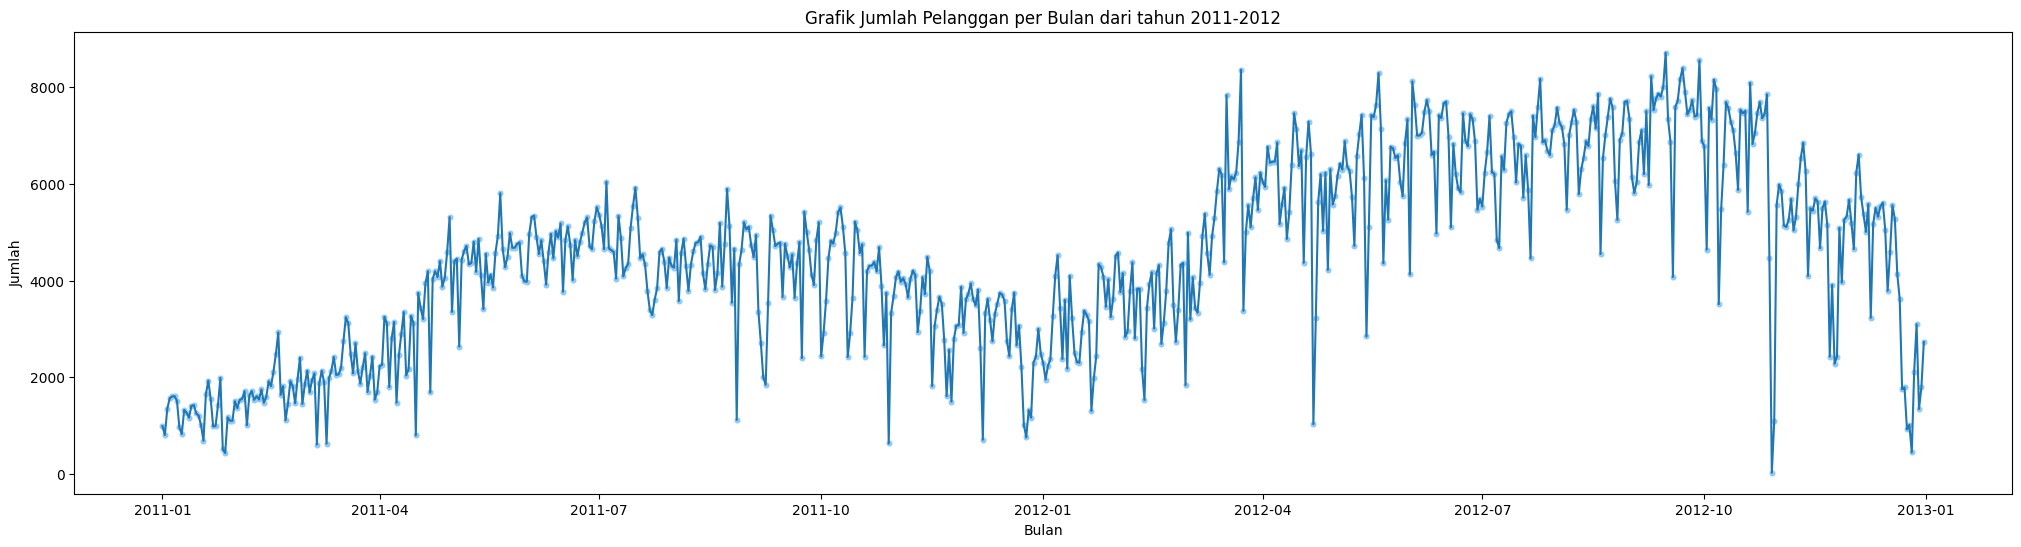

In [66]:
#membuat figure dengan ukuran (25, 6)
plt.figure(figsize=(25, 6))

#menghitung jumlah pelanggan maksimum perbulan
monthly_count = day_df['count_rental'].groupby(day_df['date_day']).max()

#membuat scatter plot untuk jumlah pelanggan maksimum per bulan
plt.scatter(monthly_count.index, monthly_count.values, c="#90CAF9", s=11, marker='o')

#membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_count.index, monthly_count.values)

#penamaan untuk sumbu x
plt.xlabel('Bulan')

#penamaan untuk sumbu y
plt.ylabel('Jumlah')

#buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan dari tahun 2011-2012')

#menampilkan plot
plt.show()

Berdasarkan visualisasi di atas, kita dapat melihat jumlah order terbanyak terjadi pada bulan september tahun 2012 dan penurunan penjualan pada bulan november tahun 2012 hingga desember tahun 2012

### Pertanyaan 2: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?

In [67]:
#melakukan grouping pada hour dan count_rental
sum_order_items_df = hour_df.groupby('hour').count_rental.sum().sort_values(ascending=False).reset_index()

<ipython-input-68-4d1161408d02>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count_rental', data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"], ax=ax[0])
<ipython-input-68-4d1161408d02>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='count_rental', data=sum_order_items_df.sort_values(by='hour', ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"], ax=ax[1])


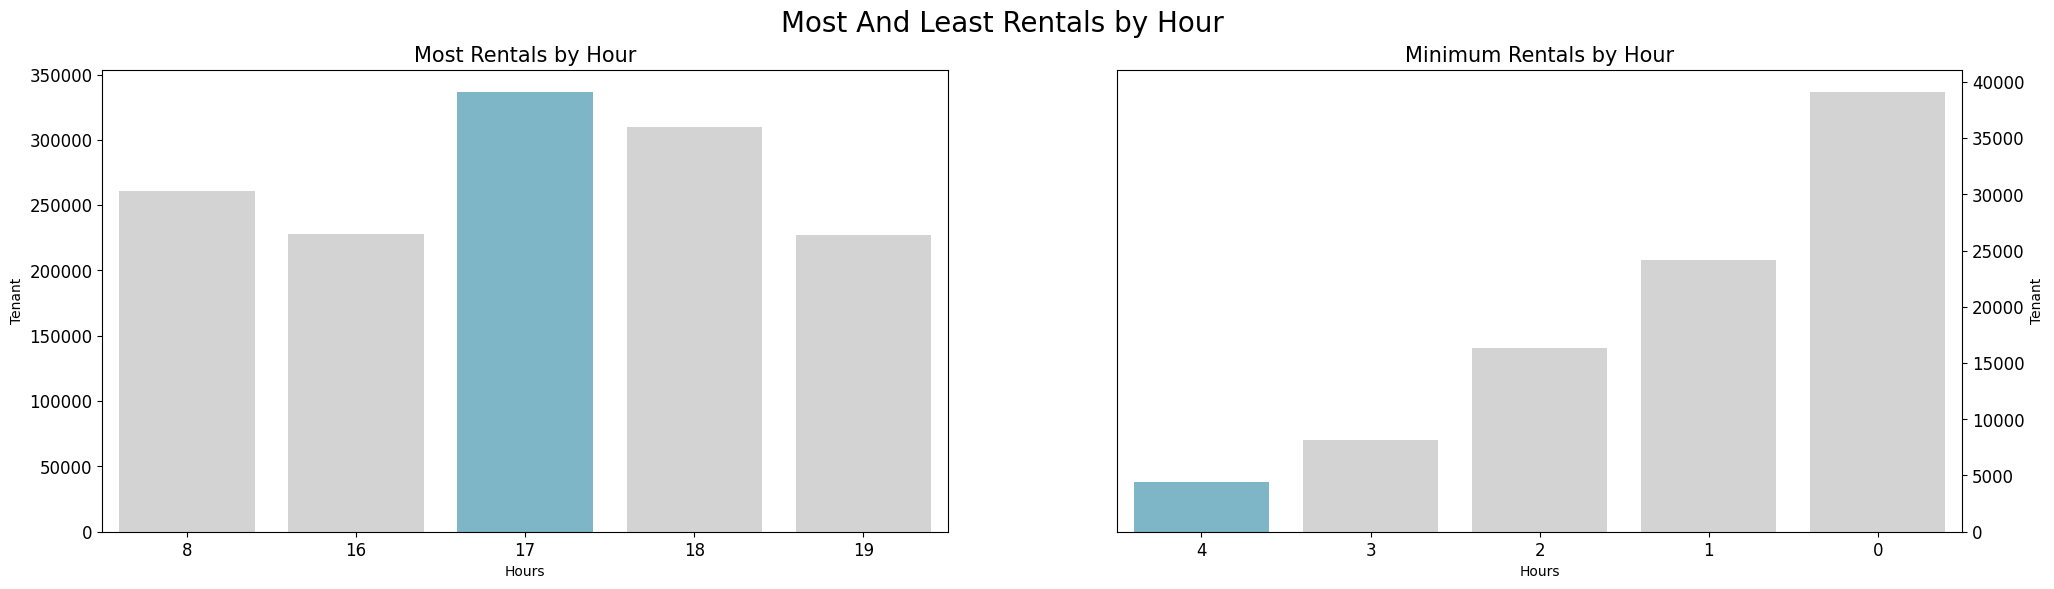

In [68]:
#membuat bar chart untuk melihat perbedaan penyewaan sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

#membuat bar plot untuk melihat penyewa terbanyak
sns.barplot(x='hour', y='count_rental', data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3"], ax=ax[0])

#membuat grafik dan judul untuk subplot pertama
ax[0].set_ylabel('Tenant')
ax[0].set_xlabel('Hours')
ax[0].set_title('Most Rentals by Hour', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].tick_params(axis='x', labelsize=12)

#membuat bar plot untuk melihat penyewa paling sedikit
sns.barplot(x='hour', y='count_rental', data=sum_order_items_df.sort_values(by='hour', ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"], ax=ax[1])

#membuat grafik dan judul untuk subplot kedua
ax[1].set_ylabel('Tenant')
ax[1].set_xlabel('Hours')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position('right')
ax[1].yaxis.tick_right()
ax[1].set_title('Minimum Rentals by Hour', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].tick_params(axis='x', labelsize=12)

#memberi judul
plt.suptitle('Most And Least Rentals by Hour', fontsize=20)

#manampilkan plot
plt.show()

Berdasarkan gambar di atas, anda dapat melihat bahwa penyewaan sepeda paling banyak ada pada jam 17 sebanyak 336860 penyewaan, kontras dengan hal tersebut, penyewaan paling sedikit ada pada jam 4 sebanyak 4428 penyewaan.

### Pertanyaan 3: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?

<ipython-input-69-7473380eb40c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count_rental', y='season', data=day_df.sort_values(by='season', ascending=False), palette=["#F7374F", "#D3D3D3", "#72BCD4", "#D3D3D3"], ax=ax, orient='h')


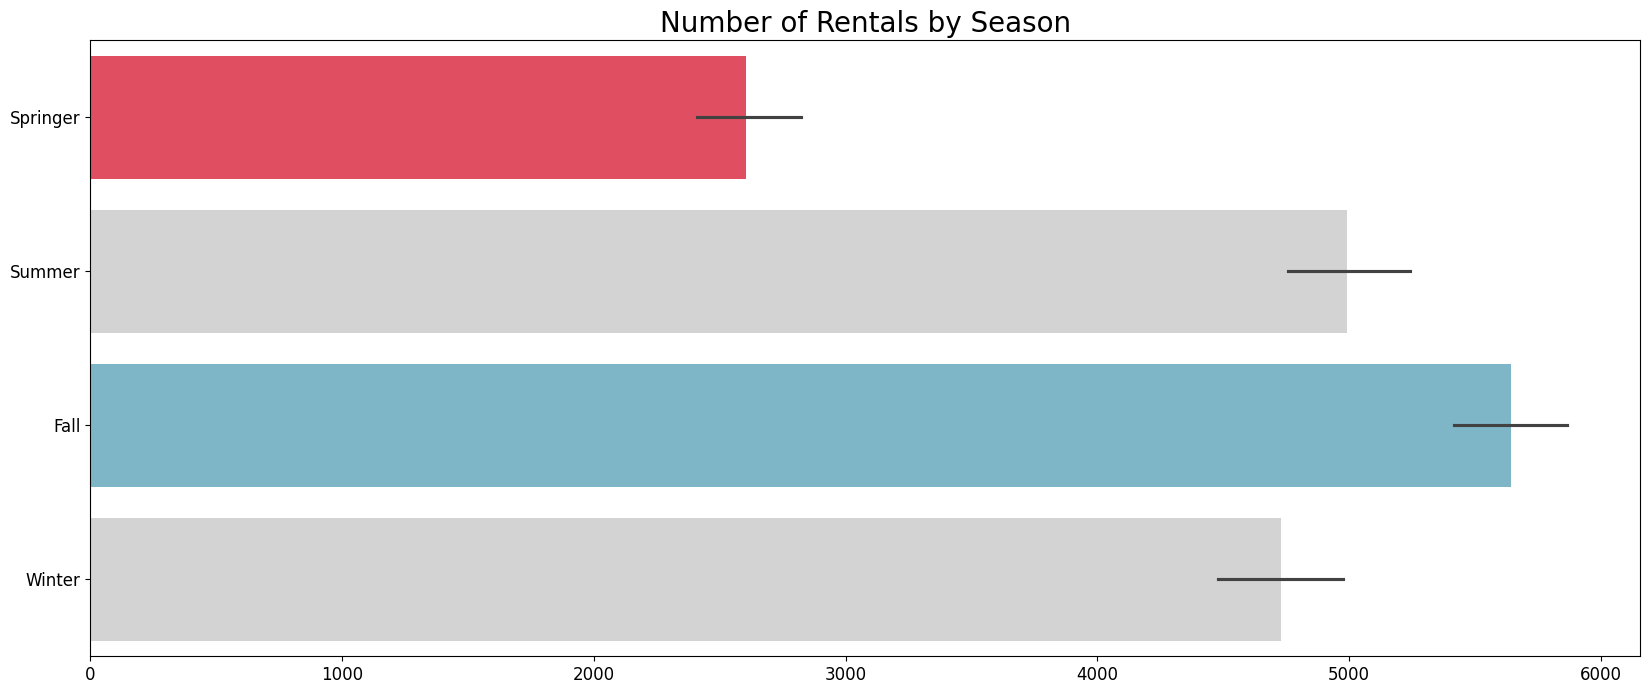

In [69]:
#membuat subplot dengan 1 baris dan 1 kolom
fig, ax = plt.subplots(figsize=(20, 8))

#membuat barplot menggunakan day_df
sns.barplot(x='count_rental', y='season', data=day_df.sort_values(by='season', ascending=False), palette=["#F7374F", "#D3D3D3", "#72BCD4", "#D3D3D3"], ax=ax, orient='h')

#mengatur judul, label, dan tick_params
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Number of Rentals by Season', loc='center', fontsize=20)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

#menampilkan plot
plt.show()

Berdasarkan gambar diatas, diketahui musim paling banyak penyewaan adalah Season Fall (musim gugur) dengan jumlah 1061129 penyewaan, dan penyewaan paling sedikit adalah pada Season Springer (musim semi) dengan jumlah 471348

### Pertanyaan 4: Perbandingan yang memilih casual atau registered?

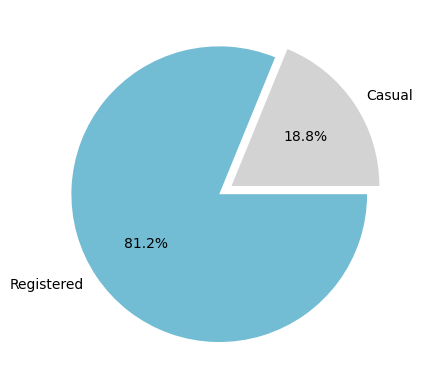

In [70]:
#menjumlahkan semua ke dalam kolom casual
total_casual = sum(day_df['casual'])

#menjumlahkan semua ke dalam kolm registered
total_registered = sum(day_df['registered'])

#membuat data untuk pie plot
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

#membuat pie plot
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"], explode=(0.1,0))

#menampilkan pie plot
plt.show()

berdasarkan gambar diatas, dapat dilihat penyewa registered sebanyak 81.2%, sedangakan penyewa casual hanya 18.8%

## Conclusion

- Pertanyaan 1: Bagaimana performa penjualan pada satu tahun terakhir?

  Berdasarkan visualisasi yang dibuat, kita dapat melihat jumlah order terbanyak terjadi pada bulan september tahun 2012 dan penurunan penjualan terjadi pada bulan november tahun 2012 hingga desember tahun 2012.

- Pertanyaan 2: Pada jam berapa penyewaan sepeda paling banyak dan paling sedikit?

  Berdasarkan visualisasi yang dibuat, anda dapat melihat bahwa penyewaan sepeda paling banyak ada pada jam 17 sebanyak 336860 penyewaan, kontras dengan hal tersebut, penyewaan paling sedikit ada pada jam 4 sebanyak 4428 penyewaan.

- Pertanyaan 3: Pada musim apa penyewaan sepeda paling banyak dan paling sedikit?

  Berdasarkan visualisasi yang dibuat, diketahui musim paling banyak penyewaan adalah Season Fall (musim gugur) dengan jumlah 1061129 penyewaan, dan penyewaan paling sedikit adalah pada Season Springer (musim semi) dengan jumlah 471348.
  
- Pertanyaan 4: Perbandingan yang memilih casual atau registered?

  Berdasarkan visualisasi yang dibuat, dapat dilihat penyewa registered sebanyak 81.2%, sedangakan penyewa casual hanya 18.8%.

##Export Dataset

In [82]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
day_df.to_csv('/content/drive/MyDrive/Colab Notebooks/day_clean_df.csv', index=False)
hour_df.to_csv('/content/drive/MyDrive/Colab Notebooks/hour_clean_df.csv', index=False)

In [85]:
files.download('/content/drive/MyDrive/Colab Notebooks/day_clean_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
files.download('/content/drive/MyDrive/Colab Notebooks/hour_clean_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>